
# <<<  SPARK  >>>    

## Começando aqui: Leia com atenção e execute os comandos

Este roteiro tem por objetivo auxiliar na implementação de um sistema de processamento de dados distribuído - data integration. PySpark é uma biblioteca Spark escrita em Python, que ajuda a usar os recursos do Apache Spark, para executar aplicações paralelas, via clusters distribuídos (vários Nós). 
Vamos usar o PySpark que é uma API Python para Apache Spark. 

Esta integração também é utilizada como base para aprendizado de máquina (ML) em larga escala. 

PySpark é uma interface para Apache Spark em Python. Ele não apenas permite que você escreva aplicativos Spark usando APIs Python, mas também fornece o shell PySpark para analisar interativamente seus dados em um ambiente distribuído de DATA INTEGRATION. O PySpark suporta a "MAIORIA" dos recursos do Spark, como Spark SQL, DataFrame, Streaming, MLlib (Machine Learning) e Spark Core.


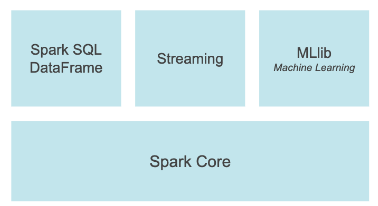



Spark SQL é um módulo Spark para processamento de dados estruturados. Ele fornece uma abstração de programação chamada DataFrame e também pode atuar como mecanismo de consulta SQL distribuído. Neste momento só vamos trabalhar com o Spark SQL e Data Frame

# Saber sobre o Spark e sua comparação com o MapReduce pode ajudar a entender porque é tendência no mercado de TI.
Spark é um outro framework de execução. Assim como o MapReduce, que funciona com um sistema de arquivos para distribuir os seus dados através do cluster e processá-los em paralelo.
 
Ele também tem um conjunto de instruções de um aplicativo escrito por um desenvolvedor. O MapReduce foi codificado a partir do Java. O Spark não suporta apenas Java, mas também Python e Scala, que é uma linguagem mais recente e contém algumas propriedades atraentes para a manipulação de dados.

Iniciando o PySpark com um modelo diferente do PI. 

In [1]:
#faz a chamada API PySpark
#Prepara o contexto do spark para ser usado. O SparkSession é o Principal ponto de entrada para funcionalidade DataFrame e SQL.

from pyspark.sql import SparkSession

Os aplicativos PySpark começam com a inicialização SparkSession, que é o ponto de entrada do PySpark, conforme abaixo. No caso de executá-lo no shell PySpark via executável pyspark, o shell cria automaticamente a sessão na variável spark para os usuários.

ATENÇÃO: pode ser que ao executar pela primeira vez vai aparecer uma sequência de WARNINGs, isto é normal pois decorre de uma implementação a partir da versão java9, ao fazer a chamada Reflection. 

Para saber mais sobre reflectin (legibilidade e acessibilidade) --> https://www.baeldung.com/java-illegal-reflective-access



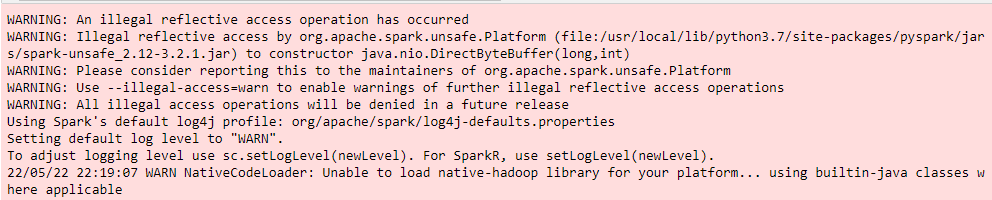

# Inicializando o SparkSession
#Obter ou instanciar um SparkContext e registrá-lo como um objeto singleton.
#Em engenharia de software, o padrão singleton é um padrão de design de software que restringe a instanciação de uma classe a uma instância "única". Isso é útil quando é necessário exatamente um objeto para coordenar ações em todo o sistema. O termo vem do conceito matemático de um singleton.
Na documentação do Scala: Métodos e valores que não são associados com instâncias individuais de uma classe são considerados objetos singleton, denotados através da palavra-chave object ao invés de class (https://docs.scala-lang.org/pt-br/tour/singleton-objects.html)

In [2]:
spark = SparkSession.builder.getOrCreate()

22/05/27 20:44:41 WARN Utils: Your hostname, felipes-MacBook-Pro.local resolves to a loopback address: 127.0.0.1; using 192.168.15.147 instead (on interface en0)
22/05/27 20:44:41 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/05/27 20:44:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Neste momento é necessário uma visão geral RDD - resilient distributed dataset  (conjunto de dados distribuídos resilientes

Em alto nível, cada aplicativo Spark consiste em um programa de driver que executa a mainfunção do usuário e executa várias operações paralelas em um cluster. A principal abstração fornecida pelo Spark é um conjunto de dados distribuído resiliente (RDD), que é uma coleção de elementos particionados nos nós do cluster que podem ser operados em paralelo. Os RDDs são criados começando com um arquivo no sistema de arquivos Hadoop (ou qualquer outro sistema de arquivos compatível com Hadoop) e transformando-o. Os usuários também podem solicitar ao Spark que persista um RDD na memória, permitindo que ele seja reutilizado com eficiência em operações paralelas. Por fim, os RDDs se recuperam automaticamente de falhas de nó.

Uma segunda abstração no Spark são as variáveis compartilhadas que podem ser usadas em operações paralelas. Por padrão, quando o Spark executa uma função em paralelo como um conjunto de tarefas em nós diferentes, ele envia uma cópia de cada variável usada na função para cada tarefa. Às vezes, uma variável precisa ser compartilhada entre tarefas ou entre tarefas e o programa de driver. O Spark oferece suporte a dois tipos de variáveis compartilhadas: variáveis de transmissão , que podem ser usadas para armazenar em cache um valor na memória em todos os nós, e acumuladores , que são variáveis que são apenas “adicionadas”, como contadores e somas.

Sabendo como o Spark funciona, vamos: 

Criação de um data frame

DataFrame é uma estrutura de dados rotulada bidimensional com colunas de tipos potencialmente diferentes. Você pode pensar nisso como uma planilha ou tabela SQL. 

Um DataFrame PySpark pode ser criado pyspark.sql.SparkSession.createDataFrame normalmente passando uma lista de listas, tuplas, dicionários ou RDD. Já pyspark.sql.Rows, é um DataFrame, como uma estrutura de dados tabulares bidimensionais, mutáveis em tamanho e potencialmente heterogêneos.

Iremos criar o dataframe com objetos do python relativos a calendário e horas

# Cria objeto Date
date(year=2021, month=1, day=10)
[OUT]: datetime.date(2021, 1, 10)
# Cria objeto Time
time(hour=14, minute=15, second=25)
[OUT]: datetime.time(14, 15, 25)
# Cria objeto Datetime
datetime(year=2021, month=1, day=10, hour=14, minute=15, second=25)
[OUT]: datetime.datetime(2021, 1, 10, 14, 15, 25)

# Inicialmente podemos criar um DataFrame como uma lista de linhas que vamos inserir manualmente, sem usar o PySpark

In [3]:
from datetime import datetime, date
import pandas as pd
from pyspark.sql import Row

df = spark.createDataFrame([
    Row(a=1, b=2., c='marise', d=date(2022, 5, 20), e=datetime(2022, 5, 20, 19, 0)),
    Row(a=2, b=3., c='alex', d=date(2022, 5, 21), e=datetime(2022, 5, 21, 20, 0)),
    Row(a=3, b=4., c='chola', d=date(2022, 5, 22), e=datetime(2022, 5, 22, 21, 0))
])
df

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

# Visualizando o DataFrame

In [4]:
df.show()

+---+---+------+----------+-------------------+
|  a|  b|     c|         d|                  e|
+---+---+------+----------+-------------------+
|  1|2.0|marise|2022-05-20|2022-05-20 19:00:00|
|  2|3.0|  alex|2022-05-21|2022-05-21 20:00:00|
|  3|4.0| chola|2022-05-22|2022-05-22 21:00:00|
+---+---+------+----------+-------------------+



# Criando o mesmo DataFrame com o PySpark 

Por padrão, o Spark infere o data schema, no entanto, às vezes podemos precisar definir nosso próprio esquema (nomes de coluna e tipos de dados), especialmente ao trabalhar com dados não estruturados e semiestruturados.


In [5]:
dfs = spark.createDataFrame([
    (1, 2., 'marise', date(2022, 5, 20), datetime(2022, 5, 20, 19,0)),
    (1, 3., 'alex', date(2022, 5, 21), datetime(2022, 5, 21, 20,0)),
    (1, 4., 'chola', date(2022, 5, 22), datetime(2022, 5, 22, 21,0)),
], schema = 'a long, b double, c string , d date, e timestamp')
dfs

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [6]:
dfs.show()

+---+---+------+----------+-------------------+
|  a|  b|     c|         d|                  e|
+---+---+------+----------+-------------------+
|  1|2.0|marise|2022-05-20|2022-05-20 19:00:00|
|  1|3.0|  alex|2022-05-21|2022-05-21 20:00:00|
|  1|4.0| chola|2022-05-22|2022-05-22 21:00:00|
+---+---+------+----------+-------------------+



# Criando o mesmo DataFrame PySpark a partir de um DataFrame Pandas

In [7]:
pandas_dfp = pd.DataFrame({
    'a' : [1, 2, 3],
    'b' : [2., 3., 4.,],
    'c' : ['marise', 'alex', 'chola'],
    'd' : [date(2022, 5, 20), date(2022, 5, 21), date(2022, 5, 22)],
    'e' : [datetime(2022, 5, 20, 19, 0), datetime(2022, 5, 21, 20, 0), datetime(2022, 5, 22, 21, 0)]
})
dfp = spark.createDataFrame(pandas_dfp)
dfp


DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [8]:
dfp.show()

+---+---+------+----------+-------------------+
|  a|  b|     c|         d|                  e|
+---+---+------+----------+-------------------+
|  1|2.0|marise|2022-05-20|2022-05-20 19:00:00|
|  2|3.0|  alex|2022-05-21|2022-05-21 20:00:00|
|  3|4.0| chola|2022-05-22|2022-05-22 21:00:00|
+---+---+------+----------+-------------------+



# Criando o mesmo DataFrame a partir de um RDD que consiste em uma lista de tuplas

In [9]:
rdd = spark.sparkContext.parallelize([
    (1, 2., 'marise', date(2022, 5, 20), datetime(2022, 5, 20, 19,0)),
    (2, 3., 'alex', date(2022, 5, 21), datetime(2022, 5, 21, 20,0)),
    (3, 4., 'chola', date(2022, 5, 22), datetime(2022, 5, 22, 21,0))
])
dfrdd = spark.createDataFrame(rdd, schema=['a', 'b', 'c', 'd', 'e'])
dfrdd

DataFrame[a: bigint, b: double, c: string, d: date, e: timestamp]

In [10]:
dfrdd.show()

+---+---+------+----------+-------------------+
|  a|  b|     c|         d|                  e|
+---+---+------+----------+-------------------+
|  1|2.0|marise|2022-05-20|2022-05-20 19:00:00|
|  2|3.0|  alex|2022-05-21|2022-05-21 20:00:00|
|  3|4.0| chola|2022-05-22|2022-05-22 21:00:00|
+---+---+------+----------+-------------------+



In [11]:
dfrdd.printSchema()

root
 |-- a: long (nullable = true)
 |-- b: double (nullable = true)
 |-- c: string (nullable = true)
 |-- d: date (nullable = true)
 |-- e: timestamp (nullable = true)



In [ ]:
#to be continued